    X  Y  Cluster Point Type
0   3  7        1     Border
1   4  6        1       Core
2   5  5        1     Border
3   6  4        2     Border
4   7  3        2       Core
5   6  2        2     Border
6   7  2        2     Border
7   8  4        2     Border
8   3  3       -1      Noise
9   2  6        1     Border
10  3  5        1       Core
11  2  4        1     Border


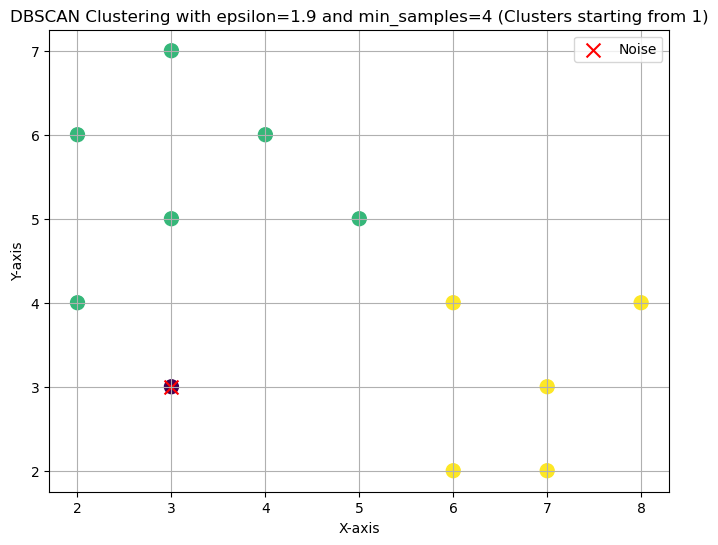

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


data_points = np.array([
    (3,7), (4,6), (5,5), (6,4), (7,3),
    (6,2), (7,2), (8,4), (3,3), (2,6),
    (3,5), (2,4)
])


dbscan = DBSCAN(eps=1.9, min_samples=4)
dbscan.fit(data_points)


labels = dbscan.labels_

labels_adjusted = np.where(labels == -1, -1, labels + 1)


df = pd.DataFrame(data_points, columns=['X', 'Y'])
df['Cluster'] = labels_adjusted


core_points = []
for i in range(len(labels)):
    if labels[i] != -1:
        distances = np.linalg.norm(data_points - data_points[i], axis=1)
        neighbors = np.sum(distances <= 1.9)
       
        if neighbors >= 4:
            core_points.append('Core')
        else:
            core_points.append('Border')
    else:
        core_points.append('Noise')


df['Point Type'] = core_points


print(df)


plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels_adjusted, cmap='viridis', s=100)


plt.scatter(data_points[labels == -1][:, 0], data_points[labels == -1][:, 1], color='red', s=100, marker='x', label='Noise')

plt.title('DBSCAN Clustering with epsilon=1.9 and min_samples=4 (Clusters starting from 1)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()